#1. 적합도 검정

[문제] 지난 3년간 빅데이터 분석기사 점수 분포가 60점 미만: 50%, 60-70점 35%, 80점이상 15%로였다.
이번 회차부터 단답형을 제외하고, 작업형3을 추가하여 300명을 대상으로 적용한 결과 60점 미만: 150명, 60-70점: 120명, 80점이상: 30명이었다. 유의수준 0.05일 때, 새로운 시험문제 유형과 기존 시험문제 유형은 점수에 차이가 없는지 검정하시오.
-	귀무가설(H0): 새로운 시험문제는 기존 시험문제 점수와 동일하다.
-	대립가설(H1): 새로운 시험문제는 기존 시험문제 점수와 다르다.


In [ ]:
#관찰
ob = [150, 120, 30]
#기대
ex = [0.5*300, 0.35*300, 0.15*300]

from scipy import stats
stats.chisquare(ob, ex)

Power_divergenceResult(statistic=7.142857142857142, pvalue=0.028115659748972056)

# 2. 독립성 검정

[문제] 빅데이터 분석기사 실기 언어 선택에 따라 합격 여부를 조사한 결과이다. 언어와 합격 여부는 독립적인가? 가설검정을 실시하시오. (유의수준 0.05)
-	귀무가설(H0): 언어와 합격 여부는 독립이다.
-	대립가설(H1): 언어과 합격 여부는 독립이지 않다.



## 2-1 교차표 데이터


- R: 합격 80명, 불합격 20명,
- Python: 합격 90명, 불합격 10명

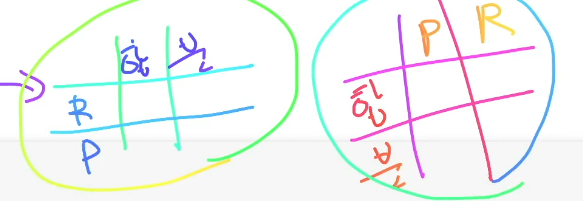

In [1]:
import pandas as pd
df = pd.DataFrame({
    '합격':[80, 90],
    '불합격':[20, 10]
    },index=['R', 'P']
)

# 인덱스 안 넣어도 됨

In [ ]:
from scipy import stats
stats.chi2_contingency(df)

# 0.05보다 크므로 귀무가설 채택

Chi2ContingencyResult(statistic=3.1764705882352944, pvalue=0.07470593331213068, dof=1, expected_freq=array([[85., 15.],
       [85., 15.]]))

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'R':[80, 20],
    'P':[90, 10]
    },index=['합격', '불합격']
)
df

,R,P
합격,80,90
불합격,20,10


In [ ]:
from scipy import stats
stats.chi2_contingency(df)

Chi2ContingencyResult(statistic=3.1764705882352944, pvalue=0.07470593331213068, dof=1, expected_freq=array([[85., 85.],
       [15., 15.]]))

In [ ]:
# 데이터 프레임 만들기 힘들 때 -> 2차원 배열 형태로 만들어도 됨
df = [[80, 20], [90, 10]]
stats.chi2_contingency(df)

Chi2ContingencyResult(statistic=3.1764705882352944, pvalue=0.07470593331213068, dof=1, expected_freq=array([[85., 15.],
       [85., 15.]]))

## 2-2 로우 데이터

In [ ]:
# 시험에서는 아마 csv 파일로 주어짐
# 데이터 생성
import pandas as pd
data = {
    '언어': ['R']*100 + ['Python']*100,
    '합격여부': ['합격']*80 + ['불합격']*20 + ['합격']*90 + ['불합격']*10
}
df = pd.DataFrame(data)

In [ ]:
df.sample(1)

,언어,합격여부
48,R,합격


In [ ]:
df = pd.crosstab(df['언어'], df['합격여부'])
df

합격여부,불합격,합격
언어,,
Python,10,90
R,20,80


In [ ]:
stats.chi2_contingency(df)

Chi2ContingencyResult(statistic=3.1764705882352944, pvalue=0.07470593331213068, dof=1, expected_freq=array([[15., 15.],
       [85., 85.]]))